# How does health insurance affect rates of use and abuse of opioids?
### Data Science - 2019
### Filipe Borba & Micah Reid

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf
import thinkplot
width = 0.4 #Width of the histograms, optional

"The National Survey on Drug Use and Health (NSDUH) provides up-to-date information on tobacco, alcohol, and drug use, mental health and other health-related issues in the United States.

NSDUH began in 1971 and is conducted every year in all 50 states and the District of Columbia. This year almost 70,000 people will be interviewed for this important study.

Information from NSDUH is used to support prevention and treatment programs, monitor substance use trends, estimate the need for treatment and inform public health policy."

The data loaded here is the result of a cleaned version of the NSDUH 2018 dataset. Only the important variables were separated and treated so the analysis would be less confusing. If you want to know more about that, access the "Data Management" notebook!

In [2]:
df = pd.read_pickle('cleaned_nsduh.pkl')
df.head(2)

,SEX,AGE,PRES_PAINKILLER_USE,REC_PAINKILLER_MISUSE,ANY_PAINKILLER_LIFETIME,OXYCONTIN_USE,OXYCONTIN_MISUSED,INCOME,FAMILY_INCOME,EDUCATION,CAIDCHIP_HI,PRIVATE_HI,ANY_HI,HEALTH_INSURANCE
0,Male,65+,Never used,Never misused,Not used,Not used in past year,Did not misuse - past year,75k+,75k+,College Graduate,Doesn't have Medicaid/CHIP,Has Private HI,With HI,Has Private HI
1,Male,35-49,Used in 12+ months,Never misused,Used,Not used in past year,Did not misuse - past year,30-40k,30-40k,College Graduate,Has Medicaid/CHIP,Doesn't have Private HI,With HI,Has Medicaid/CHIP


## Variables
#### Demographics
irsex = SEX = Respondent's sex | ("Male","Female")  
AGE2 = AGE = Respondent's age | ("12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22-23", "24-25", "26-29", "30-34", "35-49", "50-64", "65+")  
IRPINC3 = INCOME = Respondent's total income | ("10k or less", "10-20k", "20-30k", "30-40k", "40-50k", "50-75k", "75k+")  
IRFAMIN3 = FAMILY_INCOME = Respondent's family total income | ("10k or less", "10-20k", "20-30k", "30-40k", "40-50k", "50-75k", "75k+")  
eduhighcat = EDUCATION = Respondent's education category | ("Less High School", "High School Grad", "Some Coll/Assoc Degree", "College Graduate", "12-17 year olds")  

#### Health Insurance
irmcdchp = CAIDCHIP_HI = If respondent has or not the CAIDCHIP Health Insurance | ("Has Medicaid/CHIP", "Doesn't have Medicaid/CHIP")  
irprvhlt = PRIVATE_HI = If respondent has or not any Private Health Insurance | ("Has Private HI", "Doesn't have Private HI")  
IRINSUR4 = ANY_HI = If respondent has or not any kind of Health Insurance | ("With HI", "Without HI")  

#### Pain Killer usage
iroxcnanyyr = OXYCONTIN_USE =  Any OxyContin use recency | ("Used in past year", "Not used in past year")  
iroxcnnmyr = OXYCONTIN_MISUSED = OxyContin past year misuse | ("Misused - past year", "Did not misuse - past year")  
pnranylif = ANY_PAINKILLER_LIFETIME = Any pain reliever used in lifetime | ("Used", "Not used", "Used (assumed)", "Don't Know", "Refused", "Blank")  
irpnranyrec = PRES_PAINKILLER_USE = Any use of pain reliever | ("Used within year", "Used in 12+ months", "Never used")  
irpnrnmrec = REC_PAINKILLER_MISUSE = Pain reliever misuse recency | ("Misused in last 30 days", "Misused 31 days-12 months", "Misused 12+ months", "Never misused")   

## Demographic Information

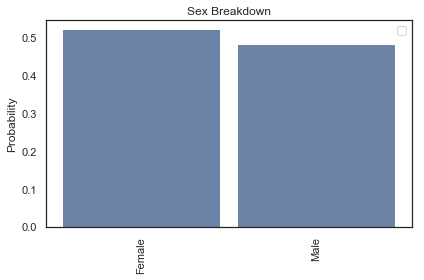

In [3]:
pmf_a = Pmf(df["SEX"])
thinkplot.Hist(pmf_a)
plt.xticks(np.arange(0, 2, step=1), rotation='vertical')
decorate(ylabel='Probability', title = 'Sex Breakdown')

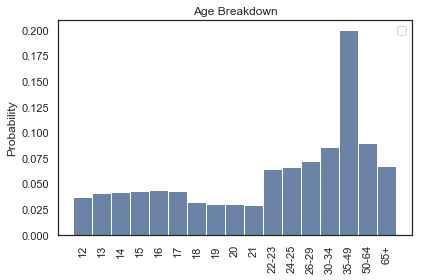

In [4]:
pmf_a = Pmf(df["AGE"])
thinkplot.Hist(pmf_a)
plt.xticks(np.arange(0, 17, step=1), rotation='vertical')
decorate(ylabel='Probability', title = 'Age Breakdown')

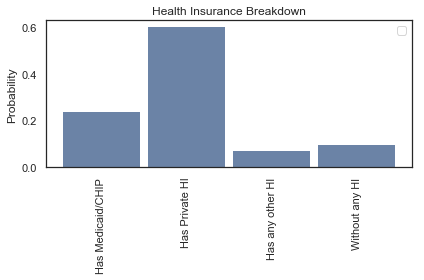

In [5]:
pmf_a = Pmf(df["HEALTH_INSURANCE"])
thinkplot.Hist(pmf_a)
plt.xticks(np.arange(0, 4, step=1), rotation='vertical')
decorate(ylabel='Probability', title = 'Health Insurance Breakdown')

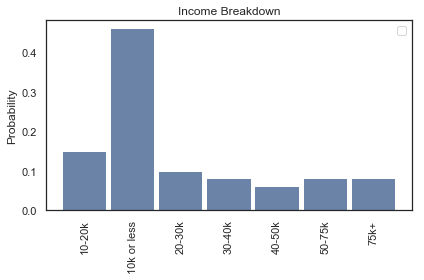

In [6]:
pmf_a = Pmf(df["INCOME"])
thinkplot.Hist(pmf_a)
plt.xticks(np.arange(0, 7, step=1), rotation='vertical')
decorate(ylabel='Probability', title = 'Income Breakdown')

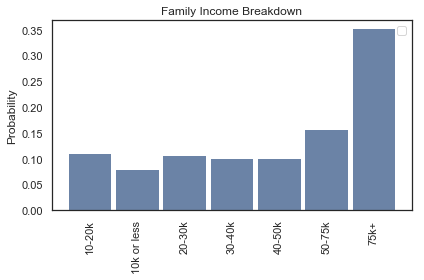

In [7]:
pmf_a = Pmf(df["FAMILY_INCOME"])
thinkplot.Hist(pmf_a)
plt.xticks(np.arange(0, 7, step=1), rotation='vertical')
decorate(ylabel='Probability', title = 'Family Income Breakdown')

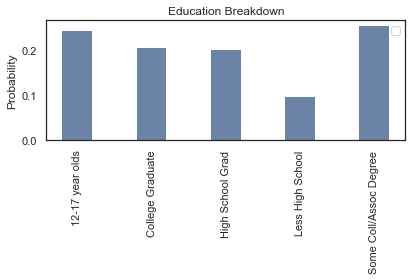

In [8]:
pmf_a = Pmf(df["EDUCATION"])
thinkplot.Hist(pmf_a, width=width)
plt.xticks(np.arange(0, 5, step=1), rotation='vertical')
decorate(ylabel='Probability', title = 'Education Breakdown')

## Exploring Crosstabs

#### Health Insurance and Painkiller use

It appears that for  general painkillers, people with private insurance or no insurance were more likely to have taken opioids, but people on Medicaid had a significantly higher proportion of people still taking painkillers compared to all that had ever started.

In [9]:
ct = pd.crosstab(df["HEALTH_INSURANCE"], df["PRES_PAINKILLER_USE"], 
                 rownames=['Health Insurance'], colnames=['Used Prescription Painkillers'], 
                 margins=True, normalize='index')
(ct*100).round(decimals=3)

Used Prescription Painkillers,Used within year,Used in 12+ months,Never used
Health Insurance,,,
Has Medicaid/CHIP,32.189,12.900,54.911
Has Private HI,29.004,28.656,42.340
Has any other HI,34.198,23.449,42.352
Without any HI,28.177,19.232,52.591
All,46.272,23.676,30.052


#### Come back to this to find survey method for misuse
People with private health insurance had the lowest misuse rates, but we need to come back to see the metric for this variable

Codebook:

Misuse of prescription drugs is defined as use in any way
not directed by a doctor, including use without a prescription of one's own medication; use in greater amounts, more often, or longer
than told to take a drug; or use in any other way not directed by a doctor.

In [10]:
ct = pd.crosstab(df["HEALTH_INSURANCE"], df["OXYCONTIN_MISUSED"],
                 rownames=['Health Insurance'], colnames=['Misused Prescription Painkillers'],
                  margins=True, normalize='index')
(ct*100).round(decimals=3)

Misused Prescription Painkillers,Misused - past year,Did not misuse - past year
Health Insurance,,
Has Medicaid/CHIP,0.933,99.067
Has Private HI,0.588,99.412
Has any other HI,0.519,99.481
Without any HI,1.532,98.468
All,99.247,0.753


However, having any type of health insurance seems to be related to increased opioid use in the short and long term.

In [11]:
ct = pd.crosstab(df["ANY_HI"], df["PRES_PAINKILLER_USE"], 
                 rownames=['Any Health Insurance'], colnames=['Used Prescription Painkillers'],
                 margins=True, normalize="index")
(ct*100).round(decimals=3)

Used Prescription Painkillers,Used within year,Used in 12+ months,Never used
Any Health Insurance,,,
With HI,30.246,24.137,45.617
Without HI,28.177,19.232,52.591
All,46.272,23.676,30.052


#### Filtering by: Used any painkiller

In [12]:
used_pk = df[df.PRES_PAINKILLER_USE != "Never used"]

Of those who had ever used prescription painkillers, those on Medicaid had a significantly higher chance of staying on painkillers or taking them recently. This could potentially be a proxy for length of time taking opioids.

In [13]:
ct = pd.crosstab(used_pk["HEALTH_INSURANCE"], used_pk["PRES_PAINKILLER_USE"],
                 rownames=['Health Insurance'], colnames=['Used Prescription Painkillers'],
                 margins=True, normalize='index')
(ct*100).round(decimals=3)

Used Prescription Painkillers,Used within year,Used in 12+ months
Health Insurance,,
Has Medicaid/CHIP,71.390,28.610
Has Private HI,50.301,49.699
Has any other HI,59.323,40.677
Without any HI,59.434,40.566
All,44.067,55.933


## Explorimg PMFs

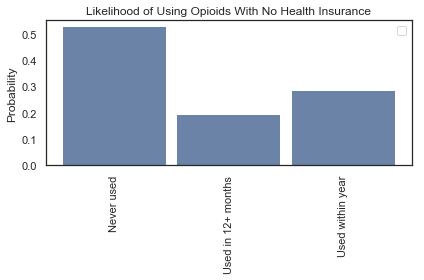

In [14]:
no_hi = df[df.HEALTH_INSURANCE == "Without any HI"]
pmf_a = Pmf(no_hi["PRES_PAINKILLER_USE"])
thinkplot.Hist(pmf_a)
plt.xticks(np.arange(0, 3, step=1), rotation='vertical')
decorate(ylabel='Probability', title = 'Likelihood of Using Opioids With No Health Insurance')

Over half of all people who have ever tried opioids have continued to take them in the past year. Some of this could be because first time use was in the past year, but it is unlikely to be a majority. 

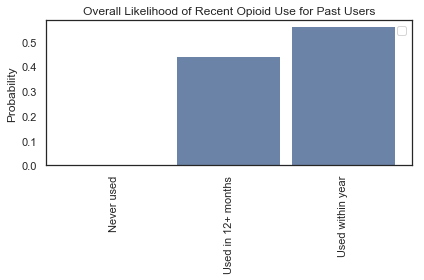

In [15]:
pmf_a = Pmf(used_pk["PRES_PAINKILLER_USE"])
thinkplot.Hist(pmf_a)
plt.xticks(np.arange(0, 3, step=1), rotation='vertical')
decorate(ylabel='Probability', title='Overall Likelihood of Recent Opioid Use for Past Users')

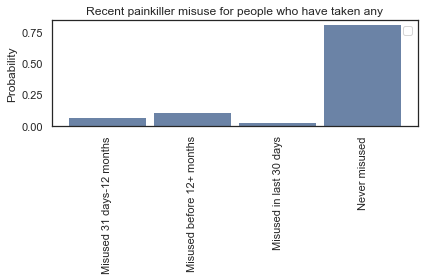

In [16]:
pmf_a = Pmf(used_pk["REC_PAINKILLER_MISUSE"])
thinkplot.Hist(pmf_a)
plt.xticks(np.arange(0, 4, step=1), rotation='vertical')
decorate(ylabel='Probability', title='Recent painkiller misuse for people who have taken any')

In [17]:
no_hi = df[df.HEALTH_INSURANCE == "Without any HI"]
priv_hi = df[df.HEALTH_INSURANCE == "Has Private HI"]

In all timeframes, those without health insurance are more likely to have abused painkillers than those with private health insurance.

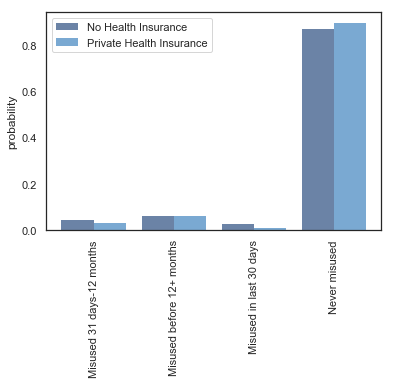

In [18]:
pmf_a = Pmf(no_hi["REC_PAINKILLER_MISUSE"])
pmf_b = Pmf(priv_hi["REC_PAINKILLER_MISUSE"])
thinkplot.Hist(pmf_a, align='right', width=width, label = 'No Health Insurance')
thinkplot.Hist(pmf_b, align='left', width=width, label = 'Private Health Insurance')
plt.xticks(np.arange(0, 4, step=1), rotation='vertical')
thinkplot.Config(ylabel='probability')

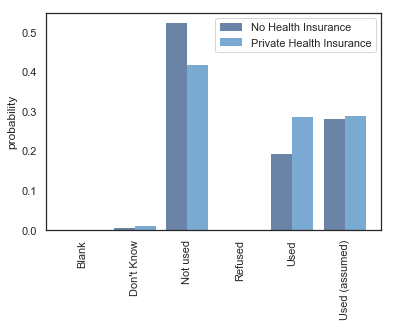

In [19]:
pmf_c = Pmf(no_hi["ANY_PAINKILLER_LIFETIME"])
pmf_d = Pmf(priv_hi["ANY_PAINKILLER_LIFETIME"])
thinkplot.Hist(pmf_c, align='right', width=width, label = 'No Health Insurance')
thinkplot.Hist(pmf_d, align='left', width=width, label = 'Private Health Insurance')
plt.xticks(np.arange(0, 6, step=1), rotation='vertical')
thinkplot.Config(ylabel='probability')

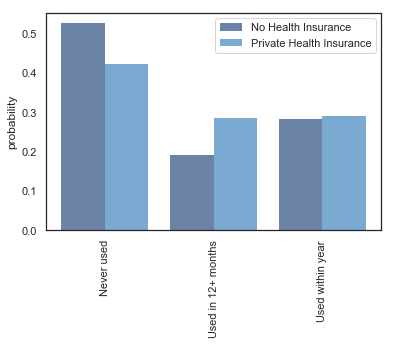

In [20]:
pmf_e = Pmf(no_hi["PRES_PAINKILLER_USE"])
pmf_f = Pmf(priv_hi["PRES_PAINKILLER_USE"])
thinkplot.Hist(pmf_e, align='right', width=width, label = 'No Health Insurance')
thinkplot.Hist(pmf_f, align='left', width=width, label = 'Private Health Insurance')
plt.xticks(np.arange(0, 3, step=1), rotation='vertical')
thinkplot.Config(ylabel='probability')